# Chapter 12: Optimization Algorithms

### Dhuvi Karthikeyan

##### 1/22/2023

## 12.1 Optimization and Deep Learning

Even though most of deep learning (if not all) deals with optimizing paramater spaces that are non-convex with respect to their losses, lessons learned from convex optimization serve as guideposts in non-convex optimization

### 12.1.1 Goal of Optimization

The goal of optimization in deep learning is to minimize the empirical risk which is the cost function over the training data (since we cannot see the test data).

### 12.1.2 Optimization Challenges in Deep Learning

#### Local Minima

One of the benefits of mini-batch stochastic gradient descent is the ability to nudge the parameters out of a minima by way of randomizing the inputs that are being iterated on.

#### Saddle Points

More common than local minima and local maxima due to the nature in which they arise

##### EIgenvalues of the Hessian Matrix

Asssume that the input of the loss function is a k-dimensional vector and it outputs a scalar (as most loss functions do). The resulting Hessian matrix of such a function will contain k-eigenvalues.

* When the eigenvalues at the position where the gradient=0 are all positive, that position is a local minimum
* When the eignevalues @grad=0 are all negative, that position is a local maximum.
* When the eigenvalues @grad=0 are mixed positive and negative , that position is a saddle point.

#### Vanishing Gradients

Most insidious problem. Happen quite often. Requires interesting trick. Alleviated partially by switch from the tan function to the ReLU activation function. Other reparameterization tricks have been useful in this space as well.

## 12.2 Convexity 

### 12.2.1 Definitions

#### Convex Sets

A convex set in a vector space is one where for every pair of points in the set there is a line that connects them, where every point of the line is also contained in the set. 

* The intersection of two convex sets is itself convex
* Most deep learning problems occur in convex sets. For example variables in $\mathbb{R}$, any lines between two points in that space stay in $\mathbb{R}$. 

#### Convex Functions

Given a convex set $X$, a convex function is one that retains the following properties given any points $a,b \in X$ and $\lambda \in [0,1]$:

$$ \lambda f(a) + (1-\lambda) f(b) >= f(\lambda a + (1-\lambda)b) $$

* Some functions can be locally complex over a defined period whereas not be convex overall.


#### Jensen's Inequality

This is a generalization of the definition of the convex function. Instead of lambda we have $\alpha_i \in \alpha \text{ s.t.} \sum_i \alpha_i = 1$

$$ \sum_i \alpha_i f(x_i) >= f(\sum_i \alpha_i x_i)$$

This is basically saying that the convex function of an expectation is no greater than the expectation of a convex function (if we take $\alpha_i$ to be a probability).

### 12.2.2 Properties

#### Local Minima are Global Minima

This is easily shown via Jensen's inequality and the definition of a convex function. 

#### Convexity and Second Derivative

A function of a single variable is convex if and only if its second derivative >= 0. A multivariable function is convex iff its Hessian matrix is positive semi-definite meaning $x^T H x >= 0$.


### 12.2.3 Constrains

Convex optimization allows for the (easier) handling of optimization with constraints, aka constrained optimization. 

$$ \mathtt{minimize}_x f(x) $$
$$ \text{s.t. }c_i(s) <= 0 \text{ for all i $\in$ \{1, ..., n\}}$$

#### Lagrangian

A method of repackaging a constrained optimization problem as an unconstrained optimization problem using linear algebra and multivariable calculus. 

$$ L(\mathbf{x}, \alpha_1, ..., \alpha_n) = f(\mathbf{x}) + \sum_{i=1}^n \alpha_i c_i \mathbf{x} $$

$\alpha_i$ are the Langrangian multipliers and they reflect the rate of change of the value trying to be optimized with the value that the constraint function equals. This formulation is easy to implement in computers because we are in essence finding the gradient of the Lagrangian and setting it equal to zero which directly codes a number of dependencies between the cost function and the function we want to optimize f(x). In the above formulation, which is a saddle point optimization problem, one would want to maximize L w.r.t $\alpha_i$ and minimize it w.r.t $\mathbf{x}$. 

#### Penalties

Approximate satisfaction of the lagrangian can be done by instsead of coercing $c_i(\textbf{x})$ to be equal to or less than 0, we instead add $\alpha_i c_c(\mathbf{x})$ to the function $f(x)$. **This is actually often more robust than the exact method especially in non-convex optimization** due to assumptions of optimality that are broken when convex assumptions are relaxed.

#### Projections

Projections can also be used to satisfy constraints. Not super touched on.

## 12.3 Gradient Descent

### 12.3.1 Gradient Descent in 1-Dimension

$$ f(x + e) = \sum_{n=0}^\infty \frac{e^nf^{(n)(x)}}{n!}$$

One of the methods of motivating gradient descent comes from Taylor expansion of the loss function. Take the loss function $f(x)$ and apply the Taylor expansion about the point $\epsilon$, approximating it to the first-order

$$ f(x) \approx f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... $$

Setting $x-x_0 = \epsilon$ and substituting $x = x_0 + \epsilon$: 

$$ f(x_0 + \epsilon) = f(x_0) + \epsilon f'(x_0) + \mathbb{O}(\epsilon^2) $$

Now if we want to minimize f(x) we can choose epsilon such that $f(x_0 + \epsilon)$ gets iteratively lesser. By choosing $\epsilon = -f'(x)$ we can ensure that the x we are at moves in the direction of a decreasing gradient. Because if the gradient is positive then we subtract that value from x and move in the reverse direction going back down the curve and if the gradient is negative at that point we subtract a negative gradient and move forward along the x axis pushing us down into the curve. We also select a hyperparameter $\eta$ which we multiply by the gradient which controls how far we step in any direction:

$$ f(x-\eta f'(x)) = f(x) = \eta f^{'2}(x) + \mathbb{O}(\eta^2f^{'2}(x)) $$


### 12.3.2 Multivariate Gradient Descent

We can extend the derivation from the single variable into the multivariable stage to get:

$$ f(\mathbf{x} + \mathbf{\epsilon}) = f(\mathbf{x}) + \epsilon^{\mathtt{T}}\nabla f(\mathbf{x}) + \mathbb{O}(||\mathbf{\epsilon}||^2)$$

### 12.3.3 Adaptive Methods

**Changing the Learning rate for each parameter that's based on past gradients** 

Choosing the perfect value of the learning rate can be rather tricky and even when chose well (finding one that causes training to converge) it can be slow. Tuning the learning rate depending on where we are in the curve seems like a desirable feature. We can do so by leveraging what we know about the second derivative. These methods aren't directly applicable to deep learning methods due to their non-convex form and the cost of computation to find these non-convex optimizers but builds intuition for clever tricks to be used in nonconvex setting.

#### Netwon's Method


$$ f(\mathbf{x} + \mathbf{\epsilon}) = f(\mathbf{x}) + \epsilon^{\mathtt{T}}\nabla f(\mathbf{x}) + \frac{1}{2!}\epsilon^{\mathtt{T}}\nabla^2 f(\mathbf{x})\mathbf{\epsilon} + \mathbb{O}(||\mathbf{\epsilon}||^3) $$

The hessian matrix is implicitly included in the above as: $\nabla^2 f(\mathbf{x})$

By taking the gradient with respect to $\epsilon$ and ignoring HoTs we instead have a closed form solution for calculating the optimal learned rate parameter which is equal to:

$$ \nabla f(\mathbf{x}) + \mathbf{H\epsilon} = 0 \text{  thus, } \mathbf{\epsilon} = -\mathbf{H}^{-1}\nabla f(\mathbf{x})$$

This approach breaks when Hessian is negative so absolute values are sometimes necessary but can also be avoided by tuning learning rate. If Hessian is way too large, computing the hessian becomes infeasible and then inverting it becomes impossilbe.

#### Convergence Analysis

Arguably not super useful as it is only for a special constrcution of the problem.

Assumptions:
* The cost function is thrice-differentiable (f'' >0)
* Function is convex

We have quadratically decreasing error which means linear convergence and linearly decreasing error means constant convergence.

#### Preconditioning

$$ \mathbf{x} <- \mathbf{x} + \eta \mathtt{diag}(\mathbf{H})^{-1}f(\mathbf{x})$$

Taking the diagonal entries of the hessian alleviates issues of comptuational cost of working with the entire Hessian. It effectively equals using a different learning rate on the different variables $x_i$ which is useful for features that have varying scales.

* Also super useful for when the loss function with respect to each parameter is very different
* The inversion step here is critical because if we have a high concavity we want to take a small step
    * If we have a flat area we can affort to take a large step

#### Gradient Descent with Line Search

Line search was designed to address two central concerns in gradient descent based optimization methods: overshooting the target and making insufficient progress. 

Line search works by identifying the direction of gradient and then searching log-space for a learning rate that maximizes the descent. It converges rapidly but is less feasible for deep learning as it requries a large computational overhead to process the entire dataset.

#### Momentum is a classical example of adaptive gradient methods. 

## 12.4 Stochastic Gradient Descent

$$ \mathbb{E}_i[\nabla_\theta Li (\theta)] = \frac{1}{n} \sum_i^n\nabla_{\theta}L_i(\theta)$$

### 12.4.1 Stochastic Gradient Updates

The computational cost of full gradient descent is $\mathbb{O}(n)$ because the objective function is applied to every single datapoint before the average is taken for that epoch. Thus the larger the dataset gets, the more computational cost. 

In stochastic gradient descent we sample one random index at uniform and perform gradient descent on that $\mathbb{O}(1)$. By virtue of the mean being an unbiased estimator of the population, we see that SGD is an unbiased estimator of GD. 


Sampling without replacement is preferred for a reason explained in 12.4.4


The injecting of stochasticity by instantaneous gradient at $\eta \nabla f_i (\mathbf{x})$ means that we may not ever converge at a minimum. This is where a dynamic learning comes into play.

### 12.4.2 Dynamic Learning Rate

* Piecewise constant decay: Decrease learning rate whenever learning stalls
$$ \eta (t) = \eta_i if t_i <= t <= t_{i+1} $$
* Exponential decay: decrease the learning rate exponentially over learning epochs
$$ \eta (t) = \eta_0 * \exp(-\lambda t)$$
* Polynomial decay: A happy intermediate that has been shown to work well in practice with $\alpha = 0.5$
$$ \eta (t) = \eta_0 * (\beta t + 1)^{- \alpha}$$

### 12.4.3 Convergence Analysis for Convex Objectives



### 12.4.4 Stochastic Gradient Descent and Finite Samples

Sampling with replacement:

P(choosing the data point at least once):

1 - P(not choosing it ever) = $1 - (1-\frac{1}{n})^n \approx 1 - \exp(-1) \approx 0.63$

P(chossing the data point exactly once):

$n\choose1$ $\frac{1}{n}(1-\frac{1}{n})^{n-1} \approx \exp(-1) \approx 0.37$

Sampling with replacement thus leads to a lot of data inefficiency so sampling without replacement is actually preferred. Data will thus be passed in random orders to ensure that the models do not have cyclical passes through the loss function.

## 12.5 Minibatch Stochastic Gradient Descent

Gradient descent f.k.a. batch gradient descent can be computationally intractable since loading such a large matrix to memory cnan be infeasible.

### 12.5.1 Vectorization and Caches

* On single CPU/GPU devices the multiple computational units, each with different memories and bandwiths can create bottlenecks in not only the computation of data but also the shuttling of data to and from memory.

    * With modern computational power it usually the memory accesses that are the issue not the computational units
    
* To calculate the number of bytes the CPU can process: $N_{GHz} * 10^9 * N_{Cores} * 32 = X$ bytes per second

    * 32 could be the number of registers?
    
* Initial access incurs significant overhead but due to burst read subsequent accesses are not too burdensome

* Cache hierarchies that go from:
    * Immediate Use For Computation (registry)
        * Within chip queued for computation (L1-cache)
            * Outside chip (l2 -cache)
                * Batched from main memory
                    * main memory

are a compromise that helps move the information closer to processing and tries to frontload accesses during computation. This is the main motivation behind batches in deep learning.

##### Example: Matrix Multiplication of 2 Arbitrary NxN matrices

1. $A_{ij} = B_{i,:}C_{:,j}$ Element-wise dot products
2. $A_{:,j} = BC_{:,j}$ Computing column-wise
3. $A = BC$ Whole computation
4. Batching B and C into smaller blocks and then computing those to find A one block at a time

If $B \in \mathbb{R}^{mxn}$ and $C \in \mathbb{R}^{nxp}$ it takes $\approx 2mnp$ floating point operations

### 12.5.2 Minibatches

The standard deviation decreases by a factor of $b^{-1/2}$ for size batch size b. However the reduction in SD is counterweighed by increase in computational cost. Thus the batch size we would prefer would be the largest bsize we can fit onto memory.

### Note:

Batch gradient descent can make it look like no training is happening. Stochastic gradient descent gets noisy in the tail of training but can show a steep dropoff in loss. Mini-batch gradient descent shows the loss is less steep but also a flatter tail after training.

### Note:

The time to reach a specific loss is the highest for SGD, lower for smaller batch sizes, and even lower for greater batch sizes. Batch SGD shows comparable time performance to mini-batch SGD with a sufficient batch size.

## 12.6 Momentum

### 12.6.1 Basics

#### The Concept of Leaky Averages

What if there was a way to decrease the variance even further that can be done by mini-batch stochastic gradient descent? Increase the batch size or **take into account the previous gradients**

$$ \mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t, t-1} $$

This simple idea spawned the branch of methods called accelerated gradient methods of which momentum is probably the most widely known.

https://distill.pub/2017/momentum/

#### The Momentum Method

$$ \mathbf{v}_t = \beta \mathbf{v}_{t-1} + \mathbf{g}_{t, t-1} $$
$$ \mathbf{x}_t = \mathbf{x}_{t-1} - \eta_t\mathbf{v}_{t} $$


#### Notes

* Momentum actually speeds up convergence beceause not only does it dampen, it also accelerates
* Desirable for both batch gradient descent and stochastic gradient descent
* Effective number of gradients is given by 
$$ \frac{1}{1-\beta}$$


In [12]:
import torch
x = torch.tensor([54321.], dtype=torch.float32)
m = torch.nn.Dropout()
m(x)

tensor([0.])

## 12.7 Adagrad


* ADAgrad is an optimizer that decreases learning rate dynamically (per parameter)
* Uses the magnitude of the gradient to tune how quickly learning rates are decayed
    * scales large gradient magnitudes with small learning rate to ensure a roughly standard # of iterations
        * how well does this work in practice?
    * Gradient is a useful proxy for second derivative
* Adagrad is most notably used for sparse problems (thing bag of words in NLP)
    * It doesn't work super well in deep learning because it can decay learning rate too aggressively

The scene for Adagrad is set in the space of sparse features.


### 12.7.1 Sparse Features and Learning Rates

In sparse data, parameters that are associated with infrequent features only get updates to them whenever we encounter that feature in the data. If we have a have a random sample of data where the infrequent feature comes later on in training after the learning rate has already decayed we may not update the weights of associated with the infrequent feature at all, and it might remain very close to random initialization.

We could fix this by updating the learning rate from something like 
$$ \eta = \frac{\eta_0}{\sqrt{t + c}} $$
$$ \text{to}$$
$$ \eta_i = \frac{\eta_0}{\sqrt{s(i.t) + c}} \text{ where s(i,t) counts the number of occurences of the feature i}$$


### 12.7.2 Preconditioning (Again)

The ratio between the smallest and largest eigenvalue is called the condition number $\kappa$. A large condition number means that the optimization problem is difficult to solve accurately. 

** **Need to Re-Review** **

### 12.7.3 The Algorithm 

$$ g_t = \partial_w l(y_t, f(x_t, w)) $$
$$ s_t = s_{t-1} + g_t^2 $$
$$ w_t = w_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} * g_t $$

The operations here are applied elementwise. THe gradients squared is the second moment or the variance of the gradients and this is a cheap proxy for the Hessian.

$s_t$ is the state vector that keeps track of the different scalings for not each parameter that increases roughly linearly because we accumulate squared gradients.

$$ \text{The learning rate effectively is reduced by a factor of }\mathbb{O}(t^{-\frac{1}{2}})$$


## 12.8 RMSProp (2012)

The effective learning rate from ADAgrad is useful for convex optimization but doesn't work well in practice for deep learning. 

RMSProp was proposed in 2012 to take advantage of the parameter-wise preconditioning from ADAgrad but also unlink the learning rate schedule from the gradient directions. Adagrad adds the squares of the gradients which leads to increase in s, due to stochastic gradient descent always having some variance about the loss. Need to normalize this. Can use $s_t/t$ or can use the leaky average: $s_t <- \gamma s_{t-1} + (1-\gamma)g_t^2$


### 12.8.1 The Algorithm

$$ s_t <- \gamma s_{t-1} + (1-\gamma)g_t^2 $$
$$ x_t <- x_{t-1} = \frac{\eta}{\sqrt{s_t + \epsilon}} * g_t $$

Because $ 1 + \gamma + \gamma^2 + \gamma^3 ... = \frac{1}{1-\gamma}$ the sum of weights is normalized to one every $\gamma^-1$ timesteps which means that the function essentially only remembers the aggregate of the last $\frac{1}{1-\gamma}$ observations.

## 12.9 Adadelta (2012)

Adedelta is basically AdaGrad but this time we smooth how sensitive the learning rate is to each parameter. It has the unique property of not having a learning rate because it uses the amount of change to calibrate future change.

### 12.9.1 The Algorithm

$s_t$: State variables to store leaky average of the gradient's second moment
$$ s_t = \rho s_{t-1} + (1-\rho)g_t^2$$

$\Delta x_t$: Leaku uavergae of the second moment of the change of parameters
$$ \Delta x_t = \rho \Delta x_{t-1} + (1-\rho)\text{g'}^2_t$$

$$ \text{Rescaled gradient: }g'_t = \frac{\sqrt{\Delta x_{t-1} + \epsilon}}{\sqrt{s_t + \epsilon}}$$

Initialize $\Delta x_0$ = 0.

Update: $ x_t = x_{t-1} - g'_t $
X confusingly is the parameter vector here.

## 12.10 Adam (2014)

**Exponential weighted moving averages aka leaky averages**

Tips and Tricks for Optimization Techniques Used Thus Far:

    * Stochastic gradient descent is more useful than batch gradient descent for issues of redundant data
    * Mini-batches use efficiency gained from vectorization and parallel processing
    * Momentum allows for adding acceleration//deceleration based on previous gradient steps
    * Adagrad introduced how to efficiently precondition without the costly computation of Hessian matrix for per param updates
    * RMSProp took that and decoupled it from the learning rate adjustment
    
Adam combines all the tips and tricks above and has become robust/effective regardless of problem and loss function

**Rescales gradients to use the approximately average gradinet divided by the average magnitude, rather than the gradients itself to updates**

$ v_t <- \beta_1 v_{t-1} + (1-beta_1)g_t $ "First moment estimate"

$ s_t <- \beta_2 s_{t-1} + (1-beta_2)g^2_t$ "Second moment estimate" 


What do we initialize $v_0$? Upon initializing $v_0=0$ we can get a nice property out from the above where the total scale by recursively substituting $v_{t-1}$ is approx equal to $1 - \beta^t$. However this biases the values towards smaller amounts initially. This can be fixed by normalizing by way of $\sum_{i=0}^{t-1}\beta^i = \frac{1-\beta^t}{1-\beta}$


$\hat{v_t} = \frac{v_t}{1-\beta_1^t}$

$\hat{s_t} = \frac{s_t}{1-\beta_2^t}$


$ g'_t = \frac{\eta\hat{v_t}}{\sqrt{\hat{s_t}}+\epsilon} $


$x_t <- x_{t-1} -g_t $

$$ \beta_1 = 0.9$$
$$ \beta_2 = 0.999$$
$$ \eta = 0.001$$
$$ \epsilon = 10^{-8}$$

## 12.11 Learning Rate Scheduling

In [20]:
def plot_learning_rate_scheduler(scheduler, num_epochs):
    plt.plot(np.arange(num_epochs), [scheduler(e) for e in range(num_epochs)])
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title(str(scheduler.__doc__))
    plt.show()

'Square Root Scheduler'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class SquareRootScheduler:
    """Square Root Scheduler"""
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

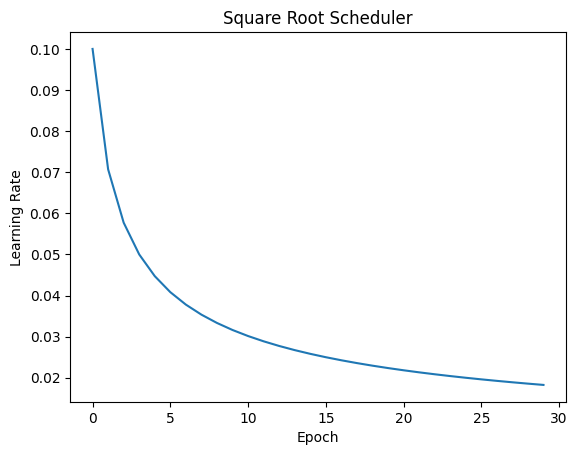

In [21]:
scheduler = SquareRootScheduler(lr=0.1)
plot_learning_rate_scheduler(scheduler, num_epochs=30)

### 12.11.3 Policies

In [23]:
### Factor Scheduler eta_t = eta_t-1 * alpha for alpha \in (0,1)

class FactorScheduler:
    """Factor Scheduler"""
    def __init__(self, factor, stop_factor_lr, base_lr):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

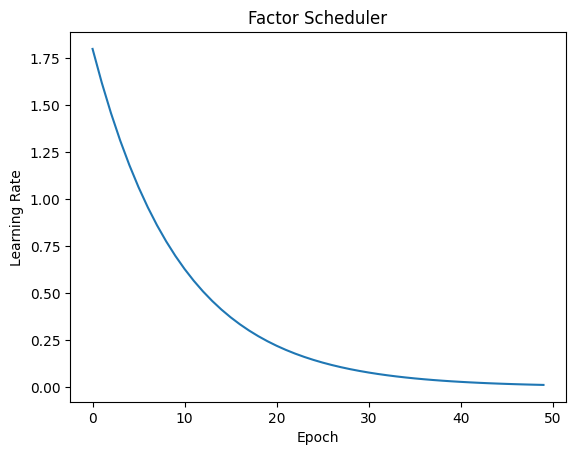

In [24]:
scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
plot_learning_rate_scheduler(scheduler, num_epochs=50)

Multifactor Scheduler is a piecewise scheduler. Works well in practice with some fidgeting to find out which time points to use for the factorizing.

#### Cosine Scheduler 

$$ \eta_t = \eta_T + \frac{\eta_0 - \eta_T}{2}(1+cost(\pi t/T))$$

$\eta_T$ is the target learning rate when piecewise we reach a specific time

Warmup is the practice of setting small gradients at first and ramping up since this allows for there to be a better chance of ending up in the right neighborhood of the loss landscape instead of moving out too far.
    * how does warmup play in with initialization?

Warmup periods before decay can help prevent divergence

In [28]:
import math 

class CosineScheduler:
    """Cosine Scheduler"""
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr


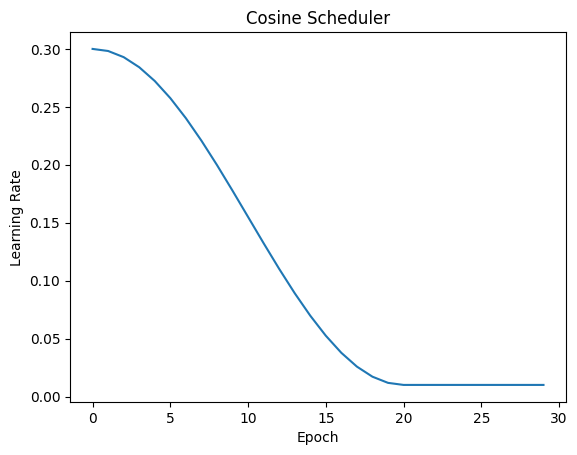

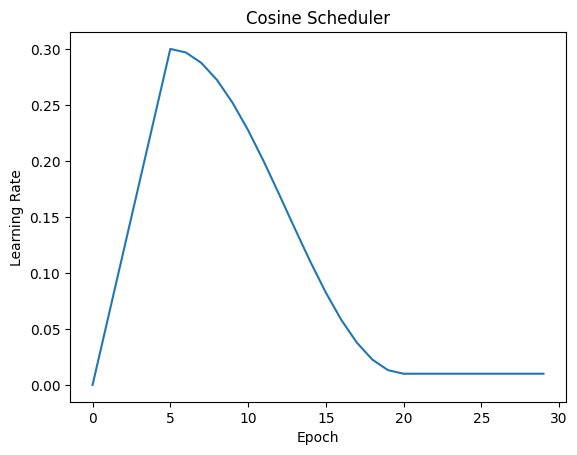

In [31]:
scheduler1 = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
scheduler2 = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01)
plot_learning_rate_scheduler(scheduler1, num_epochs=30)
plot_learning_rate_scheduler(scheduler2, num_epochs=30)